# <b style='color:magenta;'> Classificação Multi-label com BERT</b>
* Este Jupyter tem como realizar função realizar o tratamento primário dos dados.

---

Bibliotecas/Módulos

<details>    
<summary>
    <font size="3" color="magenta"><b>Install</b></font>
</summary>
<p>
<ul>
    <li> !pip install sklearn </li>
    <li> !pip install pandas </li>
    <li> !pip install scikit-multilearn </li>
</ul>
</p>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from IPython.display import Markdown, display
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud,STOPWORDS

Importando Jupyter para tratamento de texto

In [2]:
%%time
%%capture
%run 00TratadorTexto.ipynb
%run 00Confgs.ipynb

CPU times: user 182 ms, sys: 8.02 ms, total: 190 ms
Wall time: 189 ms


In [3]:
def printmd(string):
    """Adiciona cabeçalho para um dataset.
    
    :param string: texto de cabeçalho
    :type string: text
    """
    display(Markdown(string))

----

## Análise do dataset

Importação dos dados

In [4]:
dados = pd.read_csv(PATH_GERAL + "/Dados/stackoverflow_perguntas.csv")

Analisando amostras aleatórias do dataset.

In [5]:
printmd("**Dados aleatórios:**")
dados.sample(10)

**Dados aleatórios:**

,Perguntas,Tags
2188,Quero criar um botão de compartilhar para colo...,html
1548,Estou tentando criar um HTTP server em que irá...,node.js
3097,Tenho o seguinte caso: Tenho uma página de nav...,jquery
958,Ao fazer o código em jQuery para um website de...,jquery html
2193,"Galera, Eu estou com minha aplicação funciona...",node.js
1853,"Quero utilizar o Jcrop em um CODE , mas não es...",jquery
2506,Tem esse seguinte código e estou muito confuso...,angular
1867,Estou tentando adicionar o html2canvas no meu ...,html
3941,Quero que ao apertar a tecla Enter o valor sej...,jquery html
2552,"O código abaixo esta funcionando muito bem, po...",html


In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5408 entries, 0 to 5407
Data columns (total 2 columns):
Perguntas    5408 non-null object
Tags         5408 non-null object
dtypes: object(2)
memory usage: 84.6+ KB


Removendo os dados duplicados

In [7]:
dados.drop_duplicates(inplace=True, keep='first')

In [8]:
len(dados)

5395

In [9]:
dados.reset_index(inplace=True, drop='True')

In [10]:
printmd("**Cabeçalho do dataset:**")
dados.head(10)

**Cabeçalho do dataset:**

,Perguntas,Tags
0,Possuo um projeto Node.js porém preciso criar ...,node.js
1,"Gostaria de fazer testes unitários no Node.js,...",node.js
2,Como inverter a ordem com que o jQuery itera u...,jquery
3,Eu tenho uma página onde pretendo utilizar um ...,html
4,Como exibir os dados retornados do FireStore e...,html angular
5,Vi esse vídeo (link abaixo) e gostaria de cons...,html
6,Eu consigo fazer uma requisição de upload de u...,angular
7,Está apresentando o seguinte erro: 'ionic' nã...,node.js
8,Tenho um formulário reativo e eu preciso mostr...,angular
9,Eu estou com esse problema e não faço ideia de...,node.js


> Não existem dados faltantes no dataset. Nenhum preenchimento ou substituiçao será necessária.

In [11]:
dados['Tags'].unique()

array(['node.js', 'jquery', 'html', 'html angular ', 'html ', 'angular',
       'angular ', 'jquery html  ', 'jquery ', 'jquery html',
       'jquery html ', 'html angular', 'angular node.js ', 'html  ',
       'jquery html angular', 'node.js ', 'html jquery', 'html jquery ',
       'jquery angular  ', 'html node.js', 'jquery  ', 'angular node.js',
       'jquery angular', 'html node.js ', 'jquery node.js ', 'angular  ',
       'jquery angular ', 'jquery html angular ', 'node.js html ',
       ' node.js', 'node.js html', 'html angular  ', 'jquery node.js',
       'angular html', 'html angular  node.js', 'jquery html node.js',
       'html angular node.js'], dtype=object)

> Tags únicas dentro do dataset

Pode-se notar que as tags estão todas com a grafia correta, nenhuma correção precisará ser feita.

---

Listas de tags

In [12]:
lista_de_tags = list()

for tags in dados['Tags'].unique():
    for tag in tags.split():
        if tag not in lista_de_tags:
            lista_de_tags.append(tag)

In [13]:
lista_de_tags

['node.js', 'jquery', 'html', 'angular']

* Criando colunas para cada uma das tags, adicionando `1` caso a tag esteja presente e `0` caso não esteja presente. 

In [14]:
def nova_coluna(lista_tags: list, dataframe: pd.DataFrame, nome_tags: str):
    """Cria as colunas referentes às tags no dataset.
    
    :param lista_tags: lista com as tags únicas
    :type lista_tags: list
    :param dataframe: dataset
    :type: pd.Dataframe
    :nome_tags: nome da coluna
    :type: str
    """
    
    for tag in lista_tags:
        coluna = list()
        for linha_tag in dataframe[nome_tags]:
            if tag in linha_tag:
                coluna.append(1)
            else:
                coluna.append(0)
        dataframe[tag] = coluna

In [15]:
nova_coluna(lista_de_tags, dados, "Tags")

In [16]:
dados.sample(10)

,Perguntas,Tags,node.js,jquery,html,angular
174,Estou desenvolvendo uma aplicação na qual poss...,jquery,0,1,0,0
4634,"Galera, to tentando pegar a localização de um ...",jquery,0,1,0,0
2906,Alguém poderia me auxiliar em como eu possa al...,html,0,0,1,0
4181,Gostaria de saber como posso fazer para passar...,angular,0,0,0,1
5004,"Possuo um formulário, onde preciso escolher as...",jquery,0,1,0,0
4393,Instalei @angular/cli assim: npm install -g @...,angular,0,0,0,1
1842,"Tenho esse código, uma função asp: CODE Ess...",jquery html,0,1,1,0
1081,CODE CODE,jquery html,0,1,1,0
1005,Preciso tirar os números das barras do gráfico...,jquery,0,1,0,0
5084,"Não entendo muito do assunto, porém, vou tenta...",jquery,0,1,0,0


---

Verificando a quantidade de cada uma das labels dentro das perguntas

In [17]:
categorias = list(dados.columns.values)
categorias = categorias[2:]
categorias

['node.js', 'jquery', 'html', 'angular']

In [18]:
counts = []
for categoria in categorias:
    counts.append((categoria, dados[categoria].sum()))
df_stats = pd.DataFrame(counts, columns=['categoria', 'numero de marcacoes'])

In [19]:
printmd("**Marcação por categoria:**")
df_stats

**Marcação por categoria:**

,categoria,numero de marcacoes
0,node.js,641
1,jquery,2438
2,html,2336
3,angular,929


Analisando marcações nas perguntas

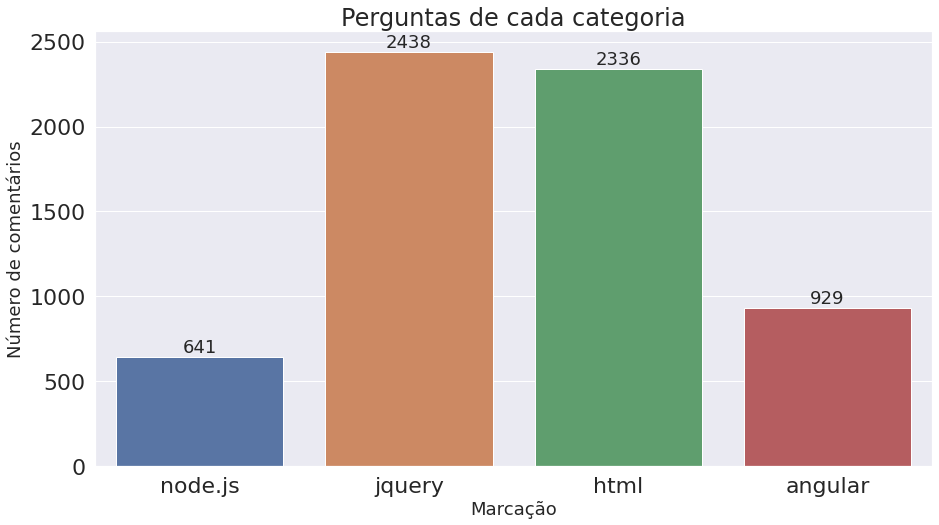

In [20]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax= sns.barplot(categorias, dados.iloc[:,2:].sum().values)

plt.title("Perguntas de cada categoria", fontsize=24)
plt.ylabel('Número de comentários', fontsize=18)
plt.xlabel('Marcação', fontsize=18)

rects = ax.patches
labels = dados.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

Analisando as perguntas com mais de uma label de marcação

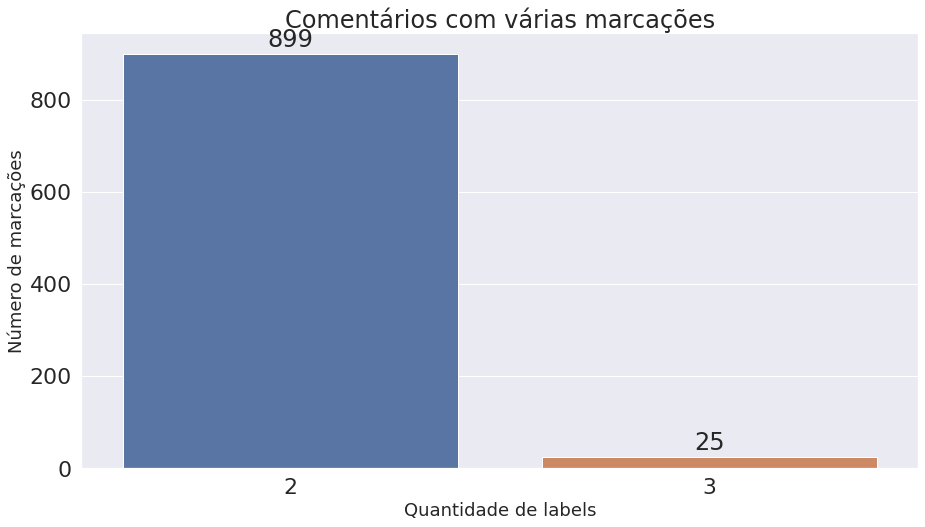

In [21]:
rowSums = dados.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Comentários com várias marcações")
plt.ylabel('Número de marcações', fontsize=18)
plt.xlabel('Quantidade de labels', fontsize=18)

rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

Podemos analisar que não possuímos neste dataset nenhuma pergunta que tenha todas as labels como positivas `(1, 1, 1, 1)`.

A maior parte dos dados é composta por perguntas com apenas um tipo de marcação.

---

### Núvens de palavras
Buscando as palavras mais utilizadas em cada uma das categorias.

* Núvem de palavras do NodeJS

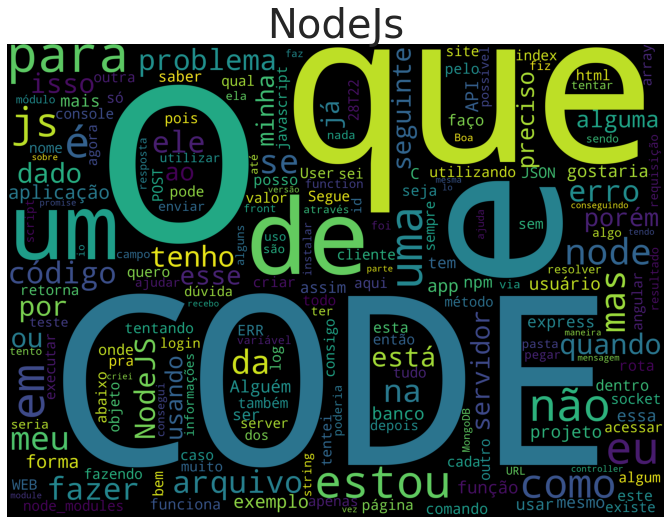

In [22]:
plt.figure(figsize=(40,25))

subset = dados[dados['node.js']==1]
text = subset['Perguntas'].values
nodejs_cloud = WordCloud(stopwords=STOPWORDS, background_color='black',
                        collocations=False, width=2500, height=1800).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("NodeJs",fontsize=40)
plt.imshow(nodejs_cloud)

* Núvem Jquery

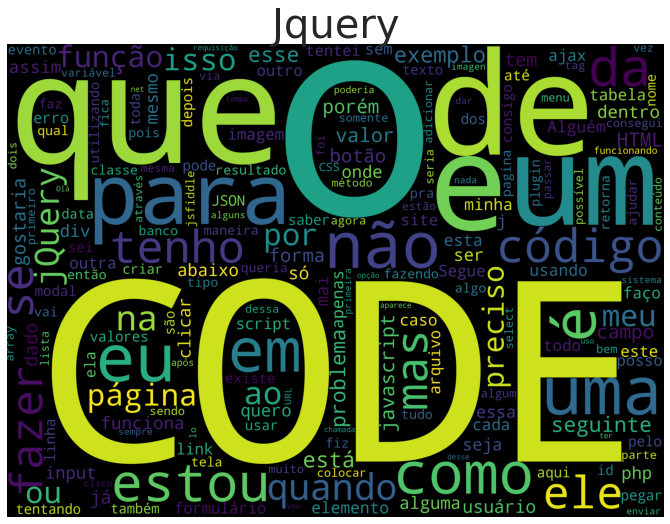

In [23]:
plt.figure(figsize=(40,25))

subset = dados[dados['jquery']==1]
text = subset['Perguntas'].values
jquery_cloud = WordCloud(stopwords=STOPWORDS, background_color='black',
                         collocations=False, width=2500, height=1800).generate(" ".join(text))

plt.subplot(2, 3, 2)
plt.axis('off')
plt.title("Jquery",fontsize=40)
plt.imshow(jquery_cloud)

* Núvem Html

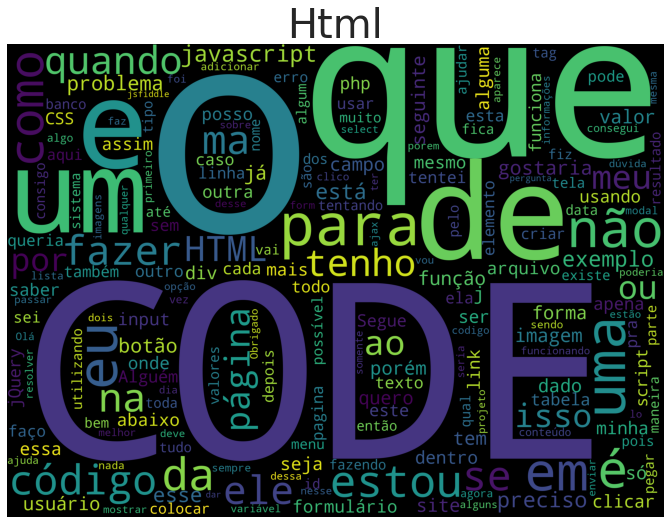

In [24]:
plt.figure(figsize=(40,25))

subset = dados[dados['html']==1]
text = subset['Perguntas'].values
html_cloud = WordCloud(stopwords=STOPWORDS, background_color='black',
                       collocations=False, width=2500, height=1800).generate(" ".join(text))

plt.subplot(2, 3, 3)
plt.axis('off')
plt.title("Html",fontsize=40)
plt.imshow(html_cloud)

* Núvem Angular

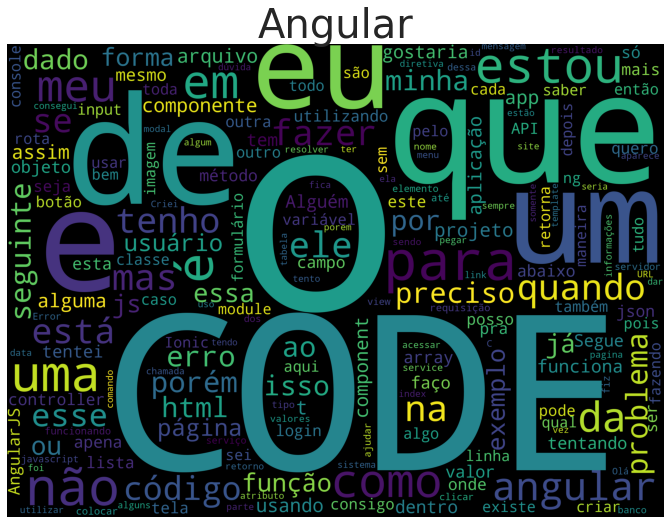

In [25]:
plt.figure(figsize=(40,25))

subset = dados[dados['angular']==1]
text = subset['Perguntas'].values
angular_cloud = WordCloud(stopwords=STOPWORDS, background_color='black',
                          collocations=False, width=2500, height=1800).generate(" ".join(text))

plt.subplot(2, 3, 4)
plt.axis('off')
plt.title("Angular",fontsize=40)
plt.imshow(angular_cloud)

> As palavras mais utilizadas são relativamente comuns, isso pode confundir ou dificultar a vida do classificador.

----

Correlação entre as marcações das labels.

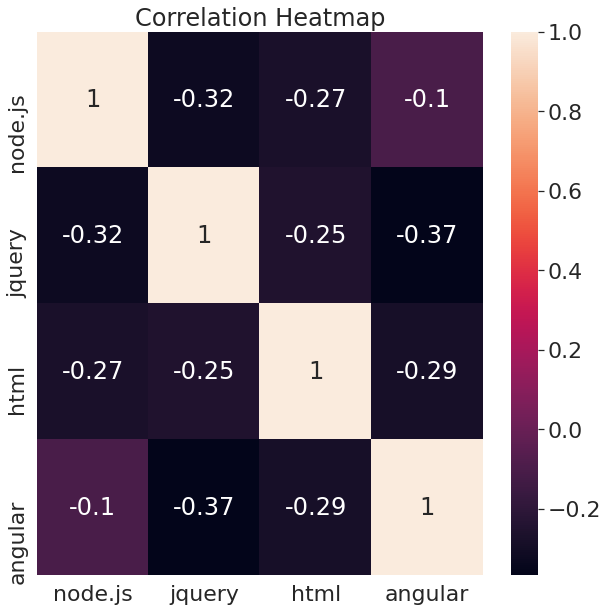

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(dados.corr().round(4),annot=True)
plt.title("Correlation Heatmap")
plt.show()

Nenhuma das labels é inversa a outra.

---

## Pré-processamento

### Tratamento do texto

In [27]:
dados['Perguntas'][5]

'Vi esse vídeo (link abaixo) e gostaria de construir um elemento que somente aparecesse quando a rolagem atingir o "ponto que toque nele". Creio que deve ser javascript. Se alguém souber ficaria muito grato :D Tentei linkar os arquivos e add a div no meu projeto mas ela simplesmente sumiu.  OBS: Ele mostra o efeito em 3:46  https://www.youtube.com/watch?v=tdgDr_icGdo '

> Além do tratamento padrão de texto será necessário também a remoção dos emojis e das urls.

* Os emojis são dispensáveis já que neste caso não vamos trabalhar com análise de sentimento dentro da pergunta.

In [28]:
tratador = TrataTexto()

In [29]:
dados['text'] = dados['Perguntas'].apply(lambda x: tratador.fix_text(x))

In [30]:
dados['text'][5]

'vi video link abaixo gostaria construir elemento somente aparecesse rolagem atingir ponto toque nele creio deve ser javascript alguem souber ficaria grato d tentei linkar arquivos add div projeto simplesmente sumiu obs mostra efeito 3 46'

---

* Juntando todas as tags em uma única coluna que será passada aos classificadores.

In [31]:
lista_tags_juntas = list(zip(dados[lista_de_tags[0]],
                             dados[lista_de_tags[1]],
                             dados[lista_de_tags[2]],
                             dados[lista_de_tags[3]]))

In [32]:
dados["label"] = lista_tags_juntas

In [33]:
dados.sample(10)

,Perguntas,Tags,node.js,jquery,html,angular,text,label
1519,Pessoal preciso inserir um vídeo no meu HTML d...,html,0,0,1,0,pessoal preciso inserir video html 5 segundos ...,"(0, 0, 1, 0)"
3087,"Estou criando um calendário ""na mão"". Sei que...",angular,0,0,0,1,criando calendario mao sei voces vao dizer exi...,"(0, 0, 0, 1)"
895,"Viva, Tenho 2 gráficos e queria trazer para el...",html,0,0,1,0,viva 2 graficos queria trazer valores base dad...,"(0, 0, 1, 0)"
5000,Boa noite! Estou tentando consumir uma API uti...,jquery,0,1,0,0,boa noite tentando consumir api utilizando jqu...,"(0, 1, 0, 0)"
3172,"Estou tentando inserir um componente ""dialog"" ...",angular,0,0,0,1,tentando inserir componente dialog angular mat...,"(0, 0, 0, 1)"
4844,"Criei algumas abas, quando eu passo o mouse po...",html,0,0,1,0,criei algumas abas passo mouse cima cada mostr...,"(0, 0, 1, 0)"
2863,Galera tirei a seguinte função em JavaScript (...,jquery,0,1,0,0,galera tirei seguinte funcao javascript jquery...,"(0, 1, 0, 0)"
200,"Ola, preciso fazer calculos como o pluguim bi...",jquery,0,1,0,0,ola preciso fazer calculos pluguim bigmoney js...,"(0, 1, 0, 0)"
1202,Preciso criar um objeto com os dados de um for...,html angular,0,0,1,1,preciso criar objeto dados formulario nao sei ...,"(0, 0, 1, 1)"
4873,Estou estudando angular 2 e me deparei com um ...,angular,0,0,0,1,estudando angular 2 deparei problema aplicacao...,"(0, 0, 0, 1)"


---

Selecionando apenas as colunas que serão utilizadas 

In [34]:
features = pd.DataFrame(index=dados.index)

In [35]:
features['text'] = dados['text']
features['label'] = dados['label']

In [36]:
features.sample(5)

,text,label
3345,nao consigo executar funcao c atraves autocomp...,"(0, 1, 0, 0)"
2423,devo utilizar observable quais vantagem desvan...,"(0, 0, 0, 1)"
380,seguinte codigo html code preciso colocar dent...,"(0, 0, 1, 0)"
2737,problema leitura arquivos codigo seguinte src ...,"(1, 0, 0, 0)"
1461,querendo realizar efeito collapse momento alte...,"(0, 0, 1, 1)"


In [37]:
# features.to_csv(PATH_GERAL + '/Dados/features.csv')